## Exercise 7 - Visualization

Marit Svendby Otervik

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle
import scipy

### 1. Spotting correlations

In [2]:
# Uncomment to download the file:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ./data/

In [3]:
regression_generated = pd.read_csv("data/regression_generated.csv") #loading the dataframe
features = regression_generated.loc[:,"features_1":"features_3"] #Choosing relevant columns from dataframe

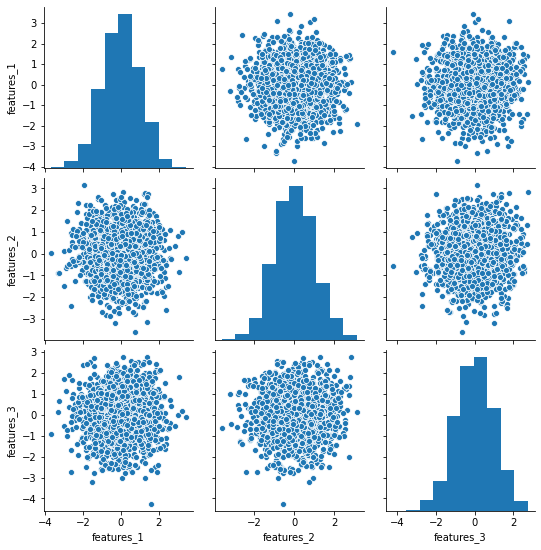

In [4]:
sns.pairplot(features)

#### Are these features correlated?
Correlations between variables can be seen as patterns or relationships in scatterplots. E.g. the y variable increases as the x variable increases (this is called positive correlation). These scatterplots have no such patterns, hence the featueres are not correlated. Instead we observe a normal distribution for the features.

### 2. Color-coded scatter plot

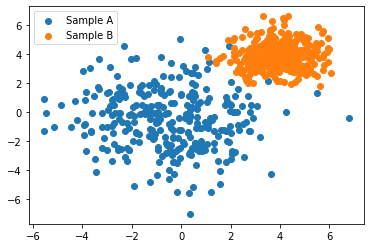

In [5]:
sampleA = np.random.normal(loc=-0.5, scale=2, size=(300,2))
#print(sampleA)
sampleB = np.random.normal(loc=4, scale=1,size=(300,2))

fig, ax = plt.subplots()
ax.scatter(sampleA[:,0],sampleA[:,1], label="Sample A")
ax.scatter(sampleB[:,0],sampleB[:,1], label="Sample B")
ax.legend()

### 3. Profile plot

In [6]:
# Uncomment to download the file:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

In [7]:
pklfile = open("data/residuals_261.pkl",'rb')
residuals = pickle.load(pklfile)
pklfile.close()

In [8]:
df = pd.DataFrame(residuals.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [9]:
df_clean = df.loc[abs(df["residuals"])<2]
df_clean

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


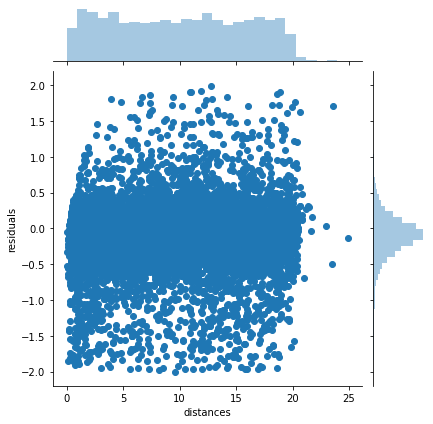

In [10]:
sns.jointplot(data=df_clean,x="distances",y='residuals')

In [11]:
x_edges = np.linspace(0,20,8)
x = 0.5*(x_edges[1:]+x_edges[:-1])

residuals_digitized = np.digitize(df_clean["distances"],x)
y = [df_clean["residuals"][residuals_digitized == i].mean() for i in range(1,len(x_edges))]

err_y = [df_clean["residuals"][residuals_digitized == i].std() for i in range(1,len(x_edges))]

<ErrorbarContainer object of 3 artists>

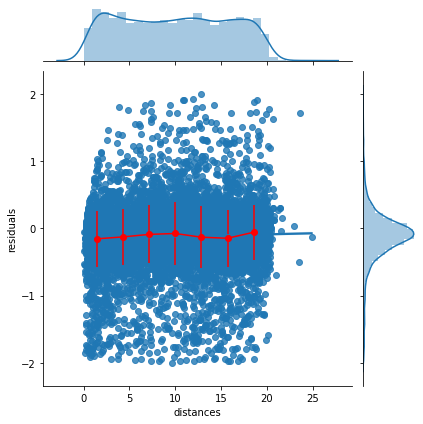

In [12]:
sns.jointplot(x='distances',y='residuals',data=df_clean,kind='reg')
plt.errorbar(x=x,y=y,yerr=err_y,marker='o',color='r')

### 4. Kernel Density Estimate

In [13]:
N = 1000
mean = 0
std = 1
bins = 50

x = np.random.normal(loc=mean,scale=std,size=(N,))

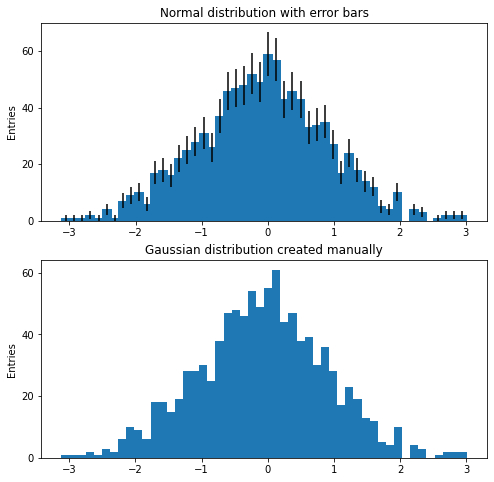

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols = 1, figsize = (8,8))

y,bin_edges = np.histogram(x, bins) #creating histogram with a meaningful number of bin
ax1.set_title("Normal distribution with error bars")
ax1.set_ylabel('Entries') #y axis label
ax1.yaxis.set_major_locator(ticker.MultipleLocator(20)) #Setting the y axis majortick labels

yStd = np.sqrt(y)

#plotting error bars
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
#ax1.errorbar(bin_centers,y,yerr=yStd,fmt='o')
ax1.bar(bin_centers,y,yerr=yStd, width=0.15)
std_default = 1.06 * x.std() * 1000**(-1/5)

gList = []
for i in x:
    gauss = scipy.stats.norm.rvs(i,std_default,1000)
    gList.append(gauss)    
g = gList

sumList = []
for i in g:
    summ = np.sum(i)
    sumList.append(summ)
traps = scipy.integrate.trapz(g)/1000

ax2.hist(traps,50)
ax2.set_title("Gaussian distribution created manually")
ax2.set_ylabel('Entries')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

plt.show()
